# Graded Exercise 1: Quadratic integrate and fire

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex1_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html

## 1.1 Quadratic Integrate and Fire neuron [20 points]
This exercise is not available online. All information is given here.

1.1.1 Read the book chapter about the quadratic integrate and fire neuron
https://neuronaldynamics.epfl.ch/online/Ch5.S3.html

[0 point]

1.1.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

[6 points]

1.1.3 Call your function: 
As above, inject a current into your neuron and plot the response.


[2 points]

1.1.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.


[4 points]

1.1.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.


[3 point]

1.1.6 Discuss your observation


[5 point]


### 1.1.1. NA
### 1.1.2.

In [4]:
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
import brian2 as b2

Quadratic Integrate and Fire Model:

Formula:

$\tau{{\text{d}}\over{\text{d}}t}u=a_{0}\(u-u_{\rm rest})\(u-u_{c})+RI\$

Exponential Integrate and Fire Model:

Formula: 

$\tau{{\text{d}}\over{\text{d}}t}u=-(u-u_{\rm rest})+\Delta_{T}\\exp\left({u-%
\vartheta_{rh}\over\Delta_{T}}\right)+RI\$

In [8]:
# EXPONENTIAL

# parameters
b2.defaultclock.dt = 0.05 * b2.ms

# default values.
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV



# QUADRATIC 

A0 = (1.0/b2.mV)
V_C = -35.0* b2.mV


parameters:
- a0>0 
- uc>urest
- For I=0 and initial condition u<uc, the voltage decays to the resting potential urest.
- For u>uc it increases so that an action potential is triggered.
- For numerical implementations of the model, the integration of Eq. (5.16) is stopped if the voltage reaches a numerical threshold θreset and restarted with a reset value ur as new initial condition (Fig. 5.9B).
- For a mathematical analysis of the model, however, the standard assumption is θreset→∞ and ur→−∞.



In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [394]:
# should fix so having the param doesnt require you to add I --> istim=None
# same for plot_spikes_multiple
# or just do with args
# also fix the two diff methods to combine into one: the spike monitor for exp doesnt return ....V
# so should undefine this in our method and just not use "v" recordings, just use axvlines it is fine


def plot_spikes(voltage_monitor, spike_monitor, I_stim, plot_all=True):
    fig, ax = plt.subplots(figsize = (15,7)) 
    ax.grid(linewidth=0.25)
    ax.plot(voltage_monitor.t/b2.ms, voltage_monitor.v[0]/b2.mV, color = "blue",label = "Voltage")
    ax.plot(spike_monitor.t/b2.ms, spike_monitor.v/b2.mV, "+", color = "red", label = "Spikes")
    if plot_all:
        ax2 = ax.twinx()
        ax2.plot(I_stim.values/b2.nA, "--", color = "grey", label = "Input Current")
        ax2.set_ylabel("Current (nAmp)")
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines + lines2, labels + labels2, loc="best")
           
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    ax.set_title("Voltage vs. Time")
    if not plot_all:
        ax.legend(loc="best")
        
    return fig, ax

In [537]:
def plot_voltage(voltage_monitor, spike_monitor, I_stim, plot_all=True):
    fig, ax = plt.subplots(figsize = (15,7)) 
    ax.grid(linewidth=0.25)
    ax.plot(voltage_monitor.t/b2.ms, voltage_monitor.v[0]/b2.mV, color = "blue",label = "Voltage")
    for l in range(len(spike_monitor.t)):
        if (l==0):
            ax.axvline(spike_monitor.t[l]/b2.ms, ls='--', c = 'red', lw=1, label = "Spikes")
        ax.axvline(spike_monitor.t[l]/b2.ms, ls='--', c = 'red', lw=1)
#     ax.plot(spike_monitor.t/b2.ms, spike_monitor.v/b2.mV, "+", color = "red", label = "Spikes")
    if plot_all:
        ax2 = ax.twinx()
        ax2.plot(I_stim.values/b2.nA, "--", color = "grey", label = "Input Current")
        ax2.set_ylabel("Current (nAmp)")
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines + lines2, labels + labels2, loc="best")
           
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    ax.set_title("Voltage vs. Time")
    if not plot_all:
        ax.legend(loc="best")
        
    return fig, ax

In [485]:
def plot_spikes_multiple(voltage_monitors, spike_monitors, I_stims, plot_all=True):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2, hspace=2)
    
    l = len(voltage_monitors)
    
    fig, ax = plt.subplots(ncols = 1, nrows = int(l), figsize = (15, 7*l))   
    
    for i in range(l):
        ax[i].grid
        ax[i].grid(linewidth=0.25)
        ax[i].plot(voltage_monitors[i].t/b2.ms, voltage_monitors[i].v[0]/b2.mV, color = "blue",label = "Voltage")
        ax[i].plot(spike_monitors[i].t/b2.ms, spike_monitors[i].v/b2.mV, "+", color = "red", label = "Spikes")
        if plot_all:
            ax2 = ax[i].twinx()
            ax2.plot(I_stims[i].values/b2.nA, "--", color = "grey", label = "Input Current")
            ax2.set_ylabel("Current (nAmp)")
            lines, labels = ax[i].get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax[i].legend(lines + lines2, labels + labels2, loc="best")

        ax[i].set_xlabel("Time (ms)")
        ax[i].set_ylabel("Voltage (mV)")
        ax[i].set_title("Voltage vs. Time")
        if not plot_all:
            ax[i].legend(loc="best")
        
    return fig, ax

In [538]:
def plot_voltage_multiple(voltage_monitors, spike_monitors, I_stims, plot_all=True):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2, hspace=2)
    
    l = len(voltage_monitors)
    
    fig, ax = plt.subplots(ncols = 1, nrows = int(l), figsize = (15, 7*l))   
    
    for i in range(l):
        ax[i].grid
        ax[i].grid(linewidth=0.25)
        ax[i].plot(voltage_monitors[i].t/b2.ms, voltage_monitors[i].v[0]/b2.mV, color = "blue",label = "Voltage")

        for l in range(len(spike_monitors[i].t)):
            if (l==0):
                ax[i].axvline(spike_monitors[i].t[l]/b2.ms, ls='--', c = 'red', lw=1, label = "Spikes")
            ax[i].axvline(spike_monitors[i].t[l]/b2.ms, ls='--', c = 'red', lw=1)
        if plot_all:
            ax2 = ax[i].twinx()
            ax2.plot(I_stims[i].values/b2.nA, "--", color = "grey", label = "Input Current")
            ax2.set_ylabel("Current (nAmp)")
            lines, labels = ax[i].get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax[i].legend(lines + lines2, labels + labels2, loc="best")

        ax[i].set_xlabel("Time (ms)")
        ax[i].set_ylabel("Voltage (mV)")
        ax[i].set_title("Voltage vs. Time")
        if not plot_all:
            ax[i].legend(loc="best")
        
    return fig, ax

In [487]:
def simulate_quadratic_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        v_rest=V_REST,
        v_reset=V_RESET,
        v_c = V_C,
        a0 = A0,
        v_spike=FIRING_THRESHOLD_v_spike,
        delta_T=SHARPNESS_delta_T,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the quadratic 
    Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_c (Quantity):  critical voltage for spike initiation by a short current pulse.
        a0 (Quantity): nonlinearity scaling term
        v_spike (Quantity) : voltage threshold for the spike condition
        delta_T (Quantity): Sharpness of the exponential term
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt= ( a0 * (v-v_rest)*(v-v_c) + R*I_stim(t, i) ) / tau  : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron, ["v"], record = True)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

**rm below... just to have spike monitor also record voltage**

In [489]:
b2.defaultclock.dt = 0.05 * b2.ms

# default values.
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

def simulate_exponential_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        v_rest=V_REST,
        v_reset=V_RESET,
        v_rheobase=RHEOBASE_THRESHOLD_v_rh,
        v_spike=FIRING_THRESHOLD_v_spike,
        delta_T=SHARPNESS_delta_T,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the exponential Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_rheobase (Quantity): Rheobase threshold
        v_spike (Quantity) : voltage threshold for the spike condition
        delta_T (Quantity): Sharpness of the exponential term
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = (-(v-v_rest) +delta_T*exp((v-v_rheobase)/delta_T)+ R * I_stim(t,i))/(tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron, ["v"], record=True)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

In [638]:
# some simple currents
I_stim_zero1 = input_factory.get_zero_current()

I_stim_step1 = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=12 * b2.namp)

I_stim_step2 = input_factory.get_step_current(
    t_start=20, t_end=20, unit_time=b2.ms, amplitude=12 * b2.namp)

I_stim_step3 = input_factory.get_step_current(
    t_start=20, t_end=520, unit_time=b2.ms, amplitude=65 * b2.pamp)

I_stim_step4 = input_factory.get_step_current(
    t_start=20, t_end=520, unit_time=b2.ms, amplitude=25 * b2.pamp)

I_stim_ramp1 = input_factory.get_ramp_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude_start=0 * b2.namp, amplitude_end = 20 * b2.namp)

In [448]:
plot_v, plot_s, plot_i = [], [], []

In [449]:
# with get zero current, no need to call explicitly since its default param
v1, s1 = simulate_quadratic_IF_neuron(I_stim = I_stim_zero1)
plot_v.append(v1)
plot_s.append(s1)
plot_i.append(I_stim_zero1)

In [450]:
# with a step current

v2, s2 = simulate_quadratic_IF_neuron(I_stim = I_stim_step1)
plot_v.append(v2)
plot_s.append(s2)
plot_i.append(I_stim_step1)

In [451]:
# with a strampep current
v3, s3 = simulate_quadratic_IF_neuron(I_stim = I_stim_ramp1)
plot_v.append(v3)
plot_s.append(s3)
plot_i.append(I_stim_ramp1)

In [453]:
v4, s4 = simulate_quadratic_IF_neuron(I_stim = I_stim_step2)
plot_v.append(v4)
plot_s.append(s4)
plot_i.append(I_stim_step2)

In [339]:
# cant seem to get right parameters so drop this for now.

# # with a sinusoidal current
# I_stim4 = input_factory.get_sinusoidal_current(
#     t_start=20, t_end=120, unit_time=b2.ms, amplitude=350 * b2.namp, frequency = 0.5*b2.kHz, direct_current=1*b2.namp)
# v4, s4 = simulate_quadratic_IF_neuron(I_stim = I_stim4)
# plot_v.append(v4)
# plot_s.append(s4)
# plot_i.append(I_stim4)
# plot_spikes(v4, s4, I_stim4)

### 1.1.3.

(<Figure size 1080x2016 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF1279CE48>,
       dtype=object))

<Figure size 432x288 with 0 Axes>

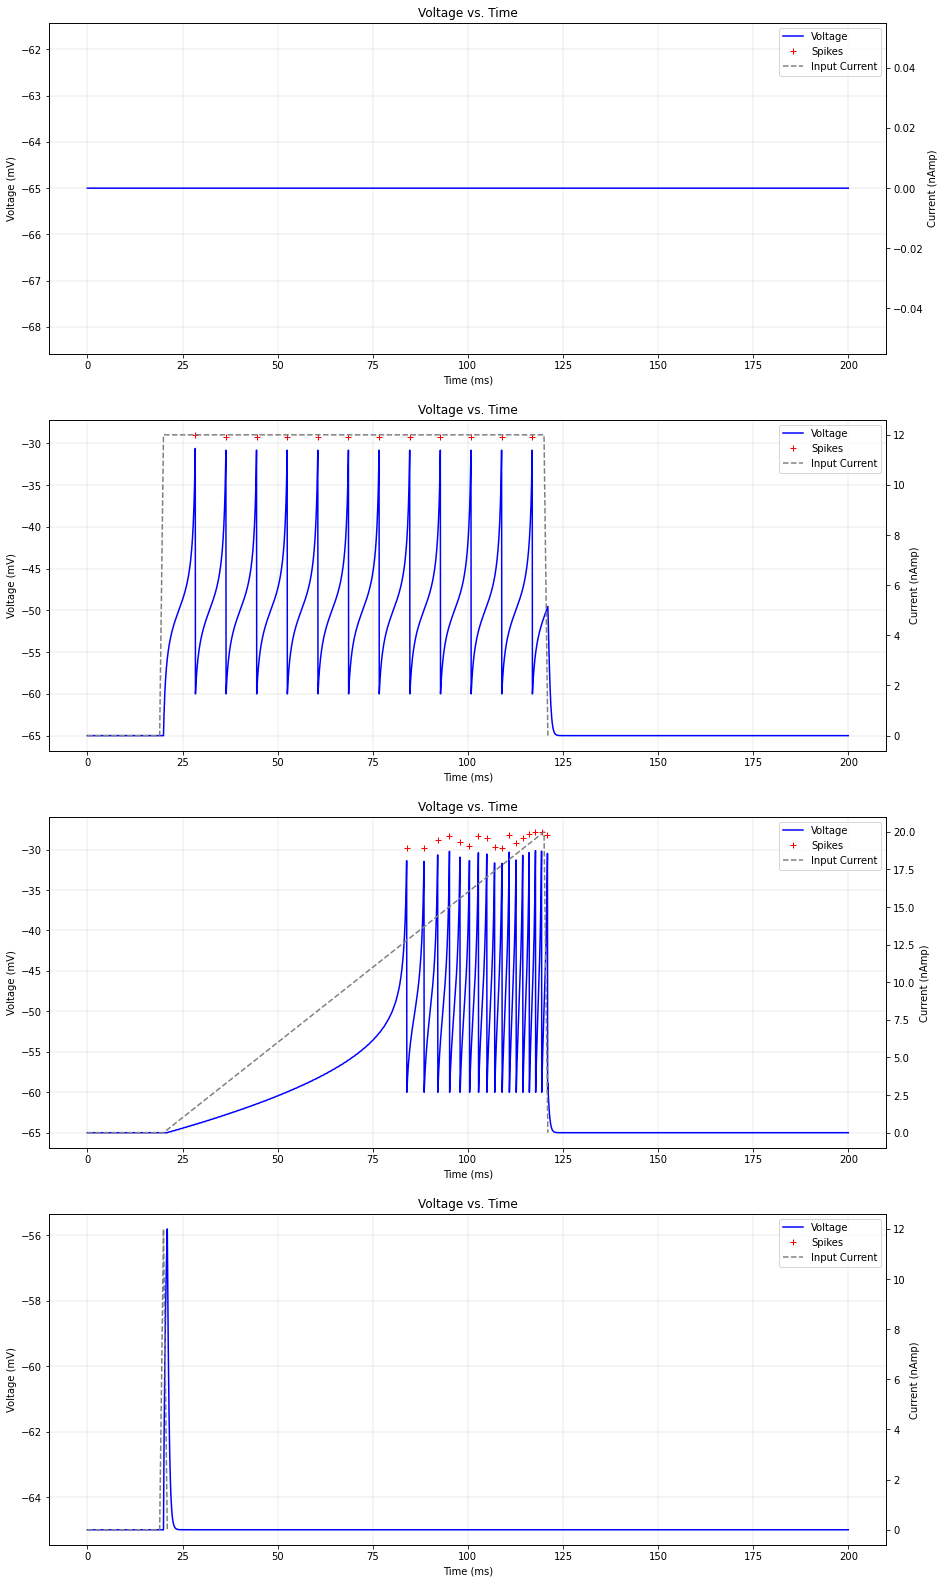

In [420]:
plot_spikes_multiple(plot_v, plot_s, plot_i)

**copied from above, rm this later** 

1.1.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.


[4 points]

1.1.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.


[3 point]

1.1.6 Discuss your observation


[5 point]

**ADD IN from exercise** below

In [3]:
# 1.1.4 Approximate the exponential model (solve it on paper, use the final expressions here)

A_0 = 1./ exp_IF.RHEOBASE_THRESHOLD_v_rh  # replace this expression with the correct formula.
print(A_0)
V_rest = 123 * b2.mV # replace this expression with the correct formula.
print(V_rest)
V_C = exp_IF.V_REST + 0.*b2.mV  # replace this expression with the correct formula.
print(V_C)

-18.18181818 m^-2 kg^-1 s^3 A
123. mV
-65. mV


In [ ]:
# the spike voltage is different, which makes sense (exp model allows voltage to go to inf in finite time)
# should plot without V, just spike times too!

WARNING    "i" is an internal variable of group "neurongroup_14", but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df18b8ebc8>)

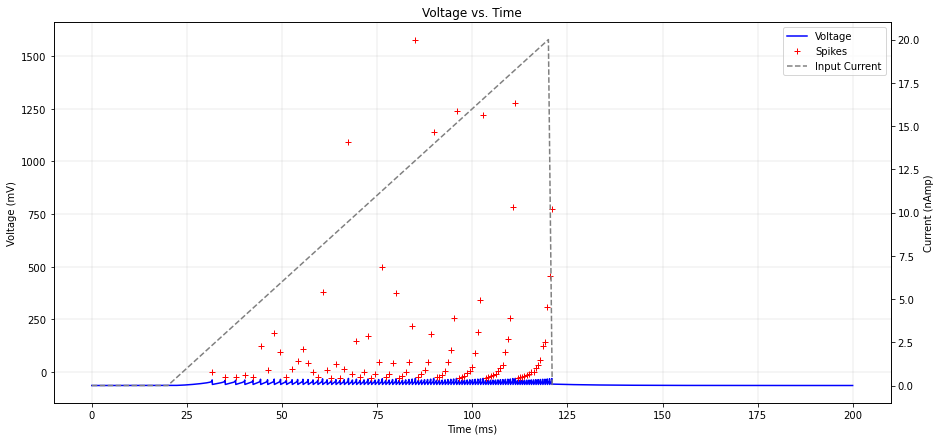

In [490]:
v5_test, s5_test = simulate_exponential_IF_neuron(I_stim=I_stim_ramp1)
plot_spikes(v5_test, s5_test, I_stim_ramp1)

In [491]:
from neurodynex3.exponential_integrate_fire.exp_IF import simulate_exponential_IF_neuron
# reimport so we dont have to deal with our slight modification of the def

let's investigate without the spike voltages, just the spike times (as the voltage is not accurate)

subthreshold regime here

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df32349288>)

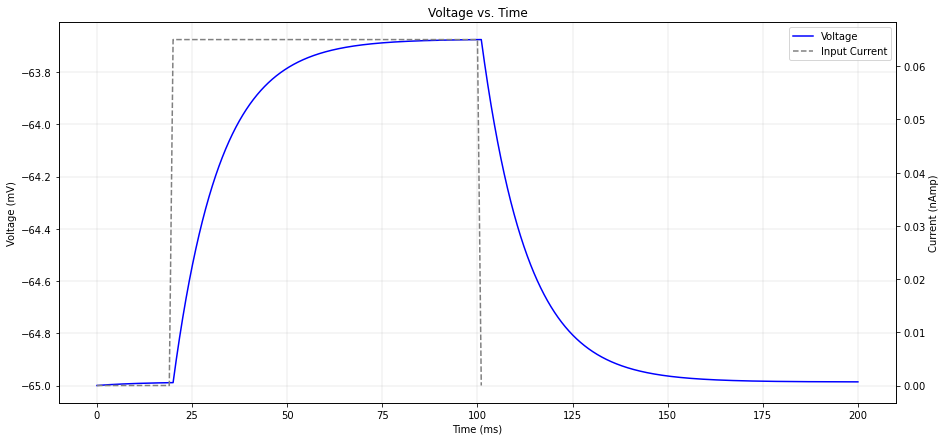

In [612]:
v_test, s_test = simulate_exponential_IF_neuron(I_stim = I_stim_step)
plot_voltage(v_test, s_test, I_stim_step3)

In [533]:
plot_v, plot_s, plot_i = [], [], []

In [534]:
v5, s5 = simulate_exponential_IF_neuron(I_stim=I_stim_zero1)
plot_v.append(v5)
plot_s.append(s5)
plot_i.append(I_stim_zero1)


v6, s6 = simulate_exponential_IF_neuron(I_stim=I_stim_step1)
plot_v.append(v6)
plot_s.append(s6)
plot_i.append(I_stim_step1)


v7, s7 = simulate_exponential_IF_neuron(I_stim=I_stim_ramp1)
plot_v.append(v7)
plot_s.append(s7)
plot_i.append(I_stim_ramp1)


v8, s8 = simulate_exponential_IF_neuron(I_stim=I_stim_step2)
plot_v.append(v8)
plot_s.append(s8)
plot_i.append(I_stim_step2)


(<Figure size 1080x2016 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF27EC32C8>,
       dtype=object))

<Figure size 432x288 with 0 Axes>

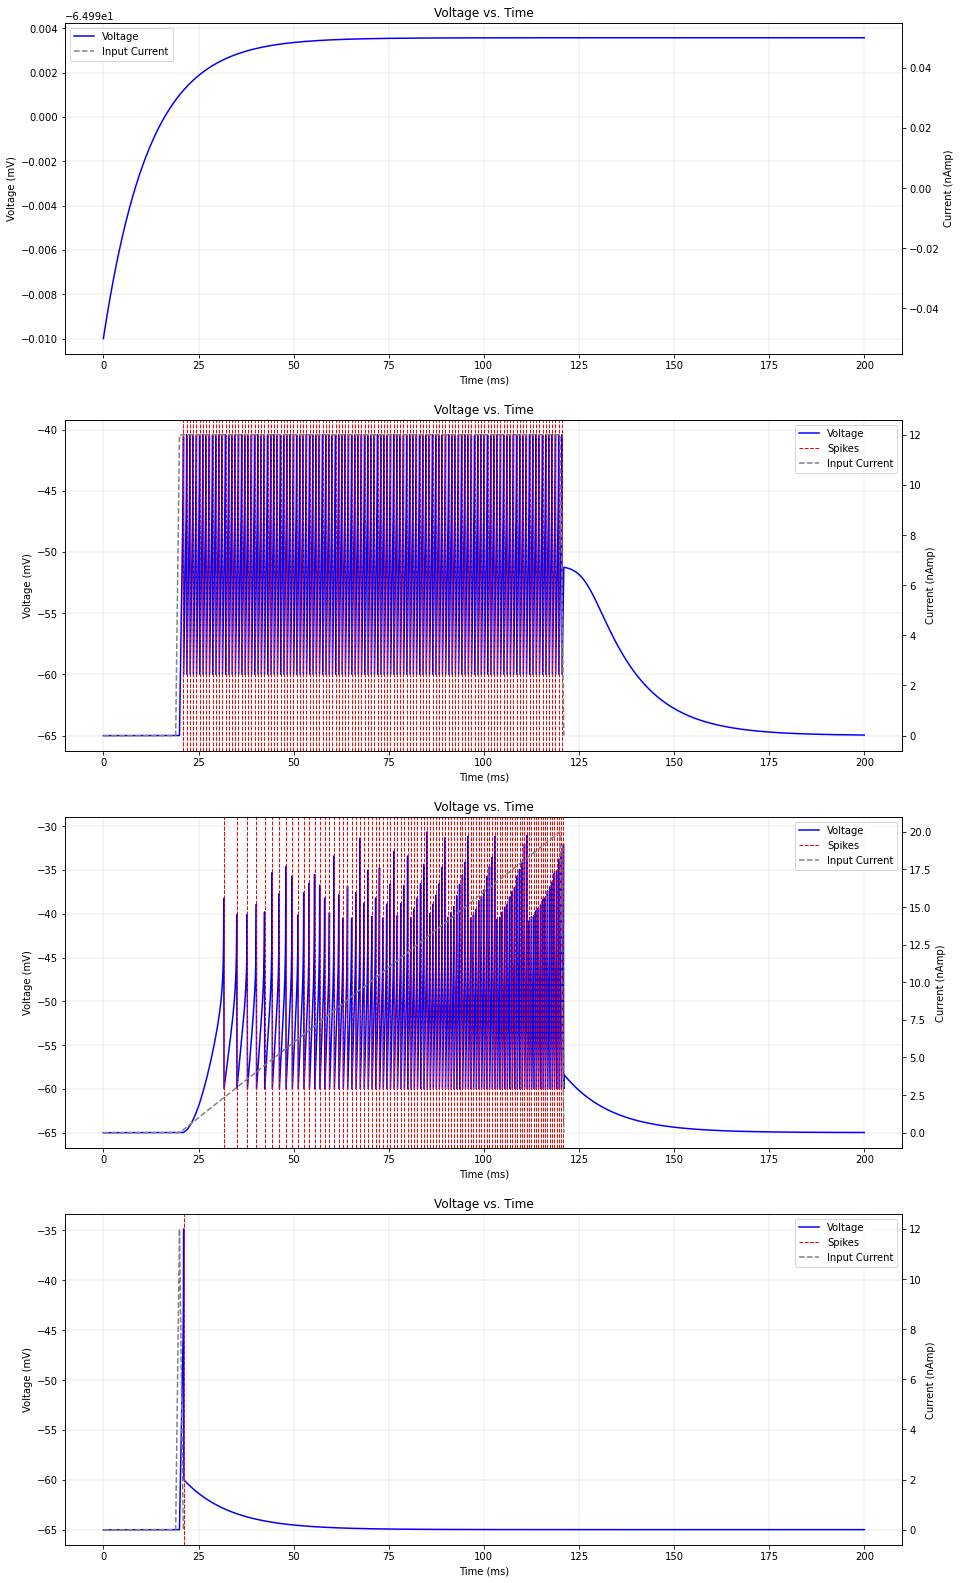

In [539]:
plot_voltage_multiple(plot_v, plot_s, plot_i)

We have seen in the previous section that experimental data suggests an exponential, rather than quadratic nonlinearity. However, close to the threshold for repetitive firing, the exponential integrate-and-fire model and the quadratic integrate-and-fire model become very similar (Fig. 5.8B). Therefore the question arises, whether the choice between the two models is a matter of personal preferences only.


For a mathematical analysis, the quadratic integrate-and-fire model is sometimes more handy than the exponential one. However, the fit to experimental data is much better with the exponential than with the quadratic integrate-and-fire model. For a prediction of spike times and voltage of real neurons (cf. Fig. 5.5), it is therefore advisable to work with the exponential rather than the quadratic integrate-and-fire model. Loosely speaking, the quadratic model is too nonlinear in the subthreshold regime and the upswing of a spike is not rapid enough once the voltage is above threshold. The approximation of the exponential integrate-and-fire model by a quadratic one only holds if the mean driving current is close to the rheobase current.



- not the same dynamics
- not the same thresholds for firing for some reason.... should compare with the same spiking symbols for clarity but yea
- at zero current, not exactly zero because of the nonlinearity in the exponential model, that's not the case for the other one
- basically show with plots what is said in paragraph above
- **DO investigate why the firing rate is different** maybe double check params
**--> question asks explicitly that.... HAHAH. but why? look at formulas! and answer**

In [ ]:
# 1.1.5 Simulate the quadratic- and the exponential model

# your code goes here. Use the parameters A_0 V_rest and V_C computed in 3.3.4

## 1.1.6 Discuss your observation

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

# Ex. 2. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.adex_model.html) to run the model for different input currents and different parameters. Get started by running the following script:

In [540]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory


## 2.1. Exercise: Adaptation and firing patterns [13 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

- returns a state monitor for variables v AND w NICE

In [553]:
from neurodynex3.adex_model.AdEx import simulate_AdEx_neuron, plot_adex_state

In [548]:
v_adex_1, s_adex_1 = simulate_AdEx_neuron()

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df2bcceb08>)

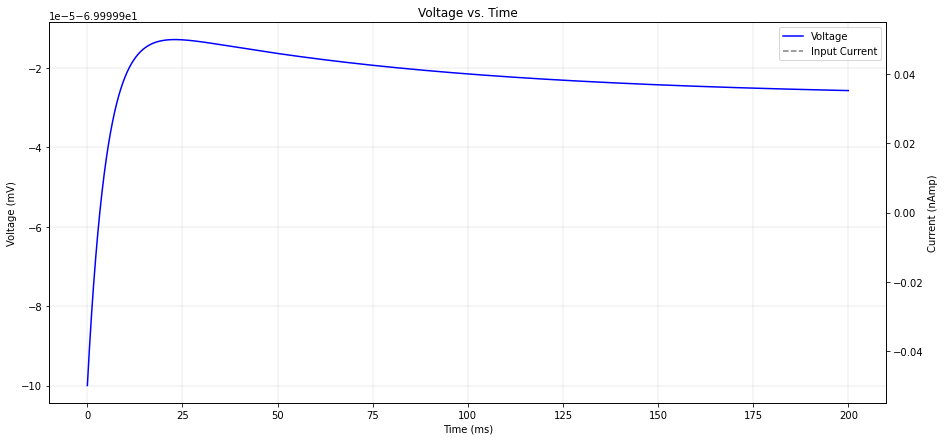

In [550]:
# just check source that this is indeed the default param but probs WHICH YEA IT IS fyi
plot_voltage(v_adex_1, s_adex_1, I_stim_zero1)

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. Table 6.1 in Chapter 6.1 provides a starting point for your explorations. 

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

|   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|
| **Type** | **$τ_{m}$ (ms)** | **a (nS)** |	**$τ_{w}$ (ms)** |	**b (pA)** | **$u_{r}$ (mV)** | **$u_{rest}$ (mV)** | **R (MΩ)** | **ϑrh (mV)** | **ΔT (mV)** |
| Description |   membrane time scale | adaptation voltage coupling | adaptation time constant| spike triggered adaptation increment | voltage reset |  voltage rest | resistance | threshold | sharpness |
| Tonic|		20|	0.0|	30.0|	60|	-55| -70 | 500 | -50 | 2 |
| Adapting|		20|	0.0|	100|	5.0|	-55| -70 | 500 | -50 | 2 |
| Init. burst|		5.0|	0.5|	100|	7.0|	-51| -70 | 500 | -50 | 2 |
| Bursting|		5.0|	-0.5|	100|	7.0|	-46| -70 | 500 | -50 | 2 |
| Irregular|	9.9|	-0.5|	100|	7.0|	-46| -70 | 500 | -50 | 2 |
| Transient|	10|	1.0|	100|	10|	-60| -70 | 500 | -50 | 2 |
| Delayed|	 5.0|	-1.0|	100|	10|	-60| -70 | 500 | -50 | 2 |



Taken from the online book so do CHECK (Table 6.1)

In [630]:
from IPython.display import Image
from IPython.core.display import HTML 

In [631]:
Image(url= "https://neuronaldynamics.epfl.ch/online/x150.png")

In [633]:
Image(url= "https://neuronaldynamics.epfl.ch/online/x151.png")

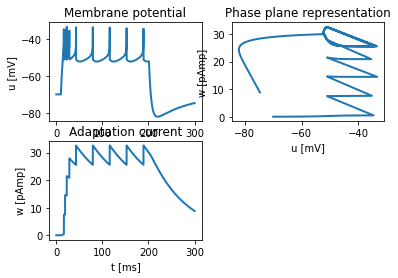

nr of spikes: 9


In [557]:
AdEx.getting_started()

thats bursting mode right there more specifically it's INIT. burst

In [613]:
# for all sets of parameters:
# step current of 65pA
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV
MEMBRANE_RESISTANCE_R = 500*b2.Mohm
V_REST = -70.0 * b2.mV

In [614]:
# set 1 of parameters : DEFAULT
# MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
# ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS
# ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
# SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
# V_RESET = -51.0 * b2.mV

In [615]:
# set 2 of parameters : TONIC
MEMBRANE_TIME_SCALE_tau_m = 20 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 0.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 30.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 60 * b2.pA
V_RESET = -55.0 * b2.mV

_AdEx_neuron(tau_m=5. * msecond, R=0.5 * Gohm, v_rest=-70. * mvolt, v_reset=-51. * mvolt, v_rheobase=-50. * mvolt, a=0.5 * nsiemens, b=7. * pamp, v_spike=-30. * mvolt, delta_T=2. * mvolt, tau_w=100. * msecond, I_stim=<brian2.input.timedarray.TimedArray object>, simulation_time=200. * msecond)[source]

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df35623088>)

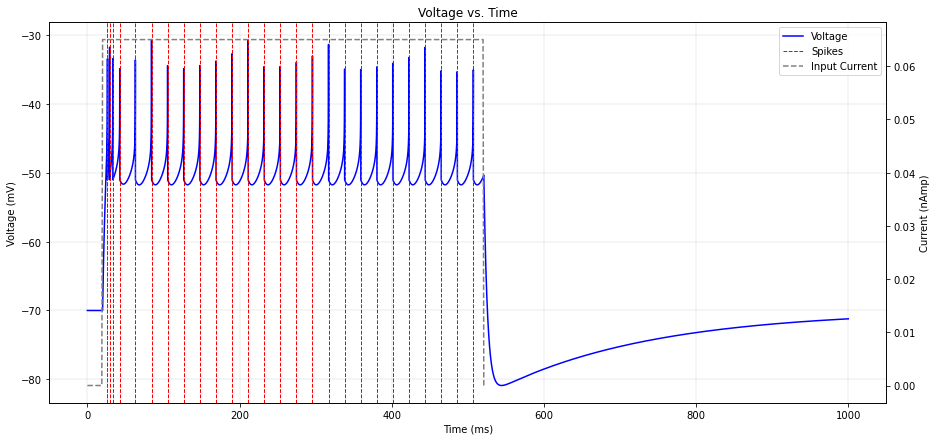

In [661]:
v_adex_2, s_adex_2 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step3,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_2, s_adex_2, I_stim_step3)

In [643]:
# set 3 of parameters : ADAPTING
MEMBRANE_TIME_SCALE_tau_m = 20 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 0.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 5.0 * b2.pA
V_RESET = -55.0 * b2.mV

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df36824948>)

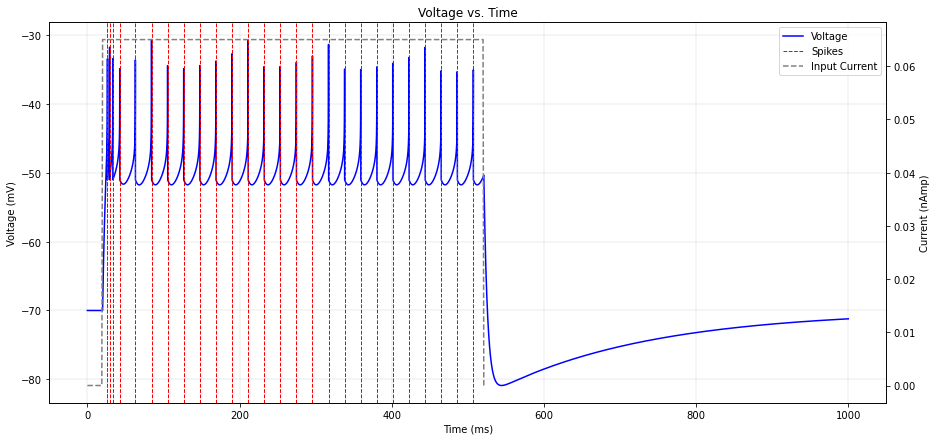

In [660]:
v_adex_3, s_adex_3 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step3,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_3, s_adex_3, I_stim_step3)

In [645]:
# set 4 of parameters : INIT. BURST == DEFAULT
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -51.0 * b2.mV

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df37f573c8>)

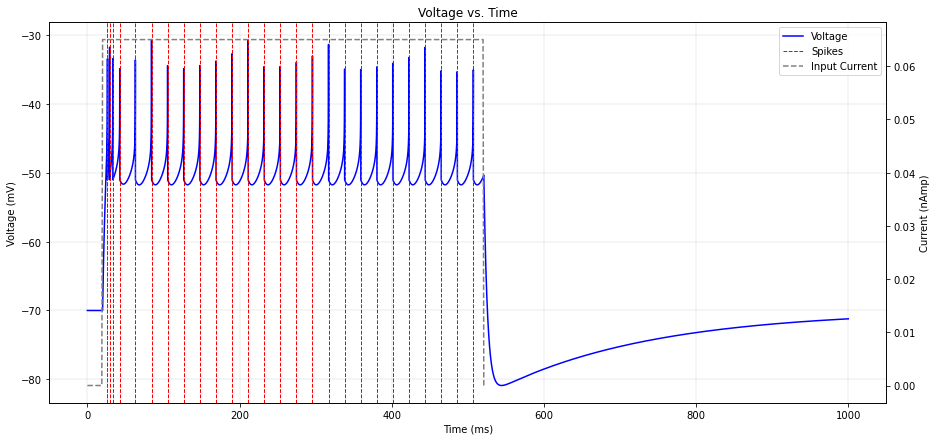

In [659]:
v_adex_4, s_adex_4 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step3,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_4, s_adex_4, I_stim_step3)

In [647]:
# set 5 of parameters : BURSTING
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -46.0 * b2.mV

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df388d9c08>)

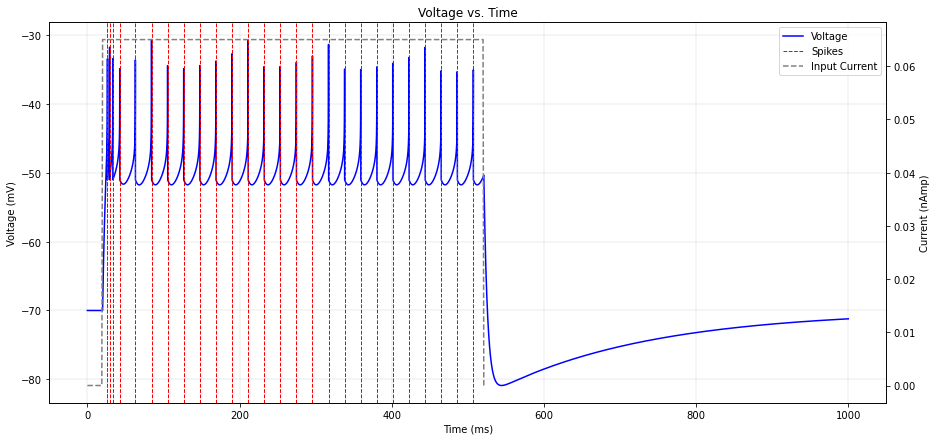

In [658]:
v_adex_5, s_adex_5 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step3,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_5, s_adex_5, I_stim_step3)

In [649]:
# set 6 of parameters : IRREGULAR
MEMBRANE_TIME_SCALE_tau_m = 9.9 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -46.0 * b2.mV

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df39ed8f08>)

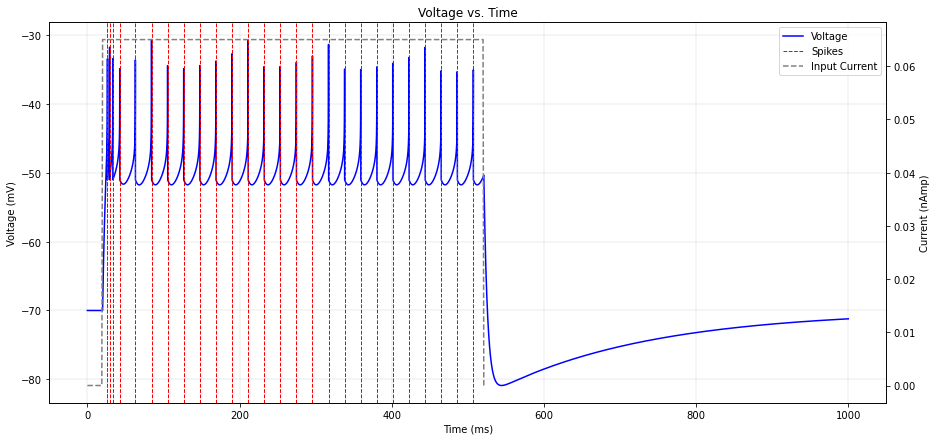

In [657]:
v_adex_6, s_adex_6 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step3,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_6, s_adex_6, I_stim_step3)

In [651]:
# set 7 of parameters : TRANSIENT
MEMBRANE_TIME_SCALE_tau_m = 10 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 1.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 10.0 * b2.pA
V_RESET = -60.0 * b2.mV

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df3a862b08>)

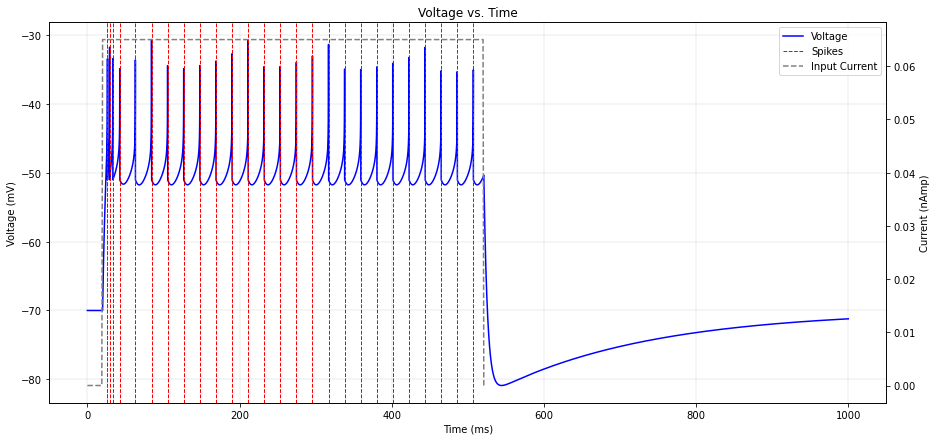

In [656]:
v_adex_7, s_adex_7 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step3,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_7, s_adex_7, I_stim_step3)

In [653]:
# set 8 of parameters : DELAYED
# REQUIRES a different step current of 25pA, not 65pA
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = -1.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 10.0 * b2.pA
V_RESET = -60.0 * b2.mV

(<Figure size 1080x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df3ab7d5c8>)

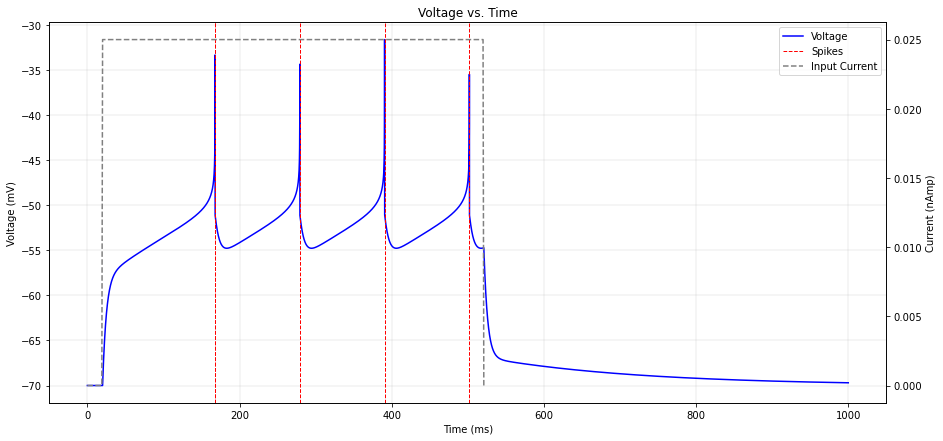

In [655]:
v_adex_8, s_adex_8 = simulate_AdEx_neuron(tau_m = MEMBRANE_TIME_SCALE_tau_m,
                                          R = MEMBRANE_RESISTANCE_R,
                                          v_rest = V_REST,
                                          v_rheobase = RHEOBASE_THRESHOLD_v_rh,
                                          a = ADAPTATION_VOLTAGE_COUPLING_a,
                                          b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                          v_spike = -30*b2.mV,
                                          delta_T = SHARPNESS_delta_T,
                                          tau_w = ADAPTATION_TIME_CONSTANT_tau_w,
                                          I_stim = I_stim_step4,
                                          simulation_time = 1000*b2.ms)
plot_voltage(v_adex_8, s_adex_8, I_stim_step4)

[2 points]

In [ ]:
# adapting 
% matplotlib inline
import brian2 as b2

[2 points]

In [ ]:
# bursting firing pattern from book

[2 points]

In [ ]:
# irregular firing pattern

[2 points]

In [ ]:
# adapting firing pattern

[2 points]

In [ ]:
# bursting firing pattern

[2 points]

In [ ]:
# irregular firing pattern

tau_m (Quantity) – membrane time scale \
R (Quantity) – membrane restistance \
v_rest (Quantity) – resting potential \
v_reset (Quantity) – reset potential \
v_rheobase (Quantity) – rheobase threshold\
a (Quantity) – Adaptation-Voltage coupling\
b (Quantity) – Spike-triggered adaptation current (=increment of w after each spike)\
v_spike (Quantity) – voltage threshold for the spike condition\
delta_T (Quantity) – Sharpness of the exponential term\
tau_w (Quantity) – Adaptation time constant\
I_stim (TimedArray) – Input current\
simulation_time (Quantity) – Duration for which the model is simulated

**could also use a plotting function for the other thing being recorded W from state_monitor**

## 2.2. Exercise: phase plane and nullclines [12 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- What is the direction of the flow arrows on the u-nullcline ?
- How do the nullclines change with respect to `a`?
- What is the interpretation of parameter `b`?
- How do flow arrows change as tau_w gets bigger?

[max 10 lines, 4 points]

- flow arrows on u-nullcline: by definition are vertical since the u-nullcline is where there are no horizontal (udot) flows...
- nullclines wrt. a: 
- b: adaptation parameter postspike event
- 

Take `a = 0`. Find a set of parameters such that, by changing `b` only, we can see two qualitatively different firing patterns. Simulate these two patterns and write their names.

[4 points]

In [2]:
# First firing pattern (simulation [2 points] and pattern name [2 points])

see the table above, take a high b and a low b (60, 5)

[4 points]

In [1]:
# Second firing pattern (simulation [2 points] and pattern name [2 points])